<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q6_teleCust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data  teleCust.txt


KNN Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

     Premium       0.00      0.00      0.00       0.0
     Regular       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

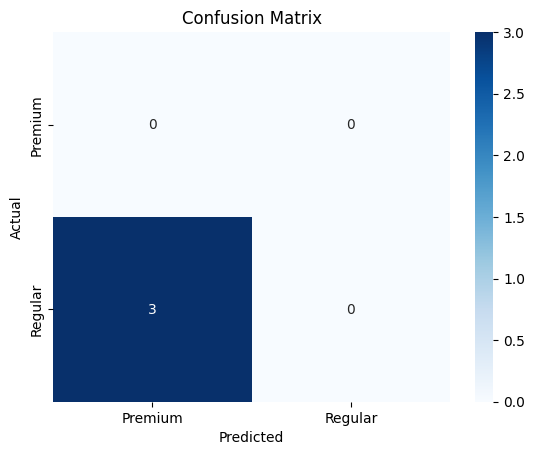

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("teleCust.txt")

# 2. Encode categorical variables
le_region = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])  # e.g., East=0, North=1, etc.

le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])  # Basic=0, Regular=1, Premium=2

# 3. Split into features and labels
X = df.drop('Category', axis=1)
y = df['Category']

# 4. Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 6. Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 7. Predict
y_pred = knn.predict(X_test)

# 8. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

# Get the unique classes present in the test set
unique_classes_test = np.unique(y_test)

# Filter target names to include only those present in the test set
target_names_subset = [le_category.classes_[i] for i in unique_classes_test]


# 9. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names_subset))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_classes_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=target_names_subset,
            yticklabels=target_names_subset)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()